# Do basic preprocessing & Cleaning before ingesting data into Solr
## Load data

In [32]:
import pandas as pd

# Load all-comments and all-posts csv
data_dir = 'data'

comments_df = pd.read_csv(f'{data_dir}/all-comments.csv')
posts_df = pd.read_csv(f'{data_dir}/all-posts.csv')

C:\Users\Aozy\AppData\Local\Temp\ipykernel_18836\2234500308.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  comments_df = pd.read_csv(f'{data_dir}/all-comments.csv')


In [33]:
posts_df.head()

,author,author_flair_text,clicked,created_utc,distinguished,edited,id,is_original_content,is_self,link_flair_text,...,permalink,saved,score,selftext,spoiler,stickied,subreddit_name,title,upvote_ratio,url
0,[deleted],NaN,NaN,1.648494e+09,NaN,NaN,tqghan,NaN,NaN,NaN,...,/r/BMWi3/comments/tqghan/my_reward_for_finally...,NaN,223,NaN,NaN,NaN,BMWi3,My reward for finally finishing my bachelor’s ...,0.98,https://i.redd.it/qs3elzcr86q81.jpg
1,nguit98,NaN,NaN,1.708648e+09,NaN,NaN,1axmm77,NaN,NaN,NaN,...,/r/BMWi3/comments/1axmm77/100k_miles/,NaN,201,I finally passed the 100k mile mark on my 2015...,NaN,NaN,BMWi3,100k miles,0.98,https://i.redd.it/z4v99nrfb8kc1.jpeg
2,labdweller,i3 BEV,NaN,1.678789e+09,NaN,NaN,11r2bh2,NaN,NaN,NaN,...,/r/BMWi3/comments/11r2bh2/rabbit_stowage_area_...,NaN,192,NaN,NaN,NaN,BMWi3,Rabbit stowage area on the i3,0.99,https://i.redd.it/yewt745fjona1.jpg
3,toteratte21,NaN,NaN,1.685004e+09,NaN,NaN,13rc663,NaN,NaN,NaN,...,/r/BMWi3/comments/13rc663/picked_her_up_straig...,NaN,176,"2020 i3s, dark brown leather and light wood.\n...",NaN,NaN,BMWi3,Picked her up straight from the source in Munich,0.99,https://i.imgur.com/7jTu2dR.jpg
4,azscram9,NaN,NaN,1.684690e+09,NaN,NaN,13o1009,NaN,NaN,NaN,...,/r/BMWi3/comments/13o1009/picked_up_this_littl...,NaN,173,First time owner and first car I’ve owned in 1...,NaN,NaN,BMWi3,Picked up this little gem over the weekend,0.96,https://i.redd.it/w4ilz2ygh91b1.jpg


In [34]:
comments_df.head()

,author,body,body_html,created_utc,distinguished,edited,id,is_submitter,link_id,parent_id,permalink,saved,score,stickied,subreddit_name,subreddit_id
0,McNutWaffle,Congrats on both! Glad I'm not the only who w...,"<div class=""md""><p>Congrats on both! Glad I&#...",1.648494e+09,NaN,NaN,i2h01oy,NaN,t3_tqghan,t3_tqghan,/r/BMWi3/comments/tqghan/my_reward_for_finally...,NaN,13,NaN,BMWi3,t5_2y1ho
1,pboksz,Congrats! That is one impressive reward! This ...,"<div class=""md""><p>Congrats! That is one impre...",1.648494e+09,NaN,NaN,i2h052j,NaN,t3_tqghan,t3_tqghan,/r/BMWi3/comments/tqghan/my_reward_for_finally...,NaN,10,NaN,BMWi3,t5_2y1ho
2,JealousPomegranate62,Congratulations!!! It’s beautiful !!!,"<div class=""md""><p>Congratulations!!! It’s bea...",1.648504e+09,NaN,NaN,i2hnwdm,NaN,t3_tqghan,t3_tqghan,/r/BMWi3/comments/tqghan/my_reward_for_finally...,NaN,4,NaN,BMWi3,t5_2y1ho
3,MMinthemirror,Congratulations! That's a fantastic car for a ...,"<div class=""md""><p>Congratulations! That&#39;s...",1.648504e+09,NaN,NaN,i2hmqoo,NaN,t3_tqghan,t3_tqghan,/r/BMWi3/comments/tqghan/my_reward_for_finally...,NaN,3,NaN,BMWi3,t5_2y1ho
4,janithemuse488,Welcome to the family! Congratulations.,"<div class=""md""><p>Welcome to the family! Con...",1.648509e+09,NaN,NaN,i2hy1od,NaN,t3_tqghan,t3_tqghan,/r/BMWi3/comments/tqghan/my_reward_for_finally...,NaN,3,NaN,BMWi3,t5_2y1ho


# Drop some unnecessary columns, normalize comments and posts into a single dataframe

In [35]:
# Drop unnecessary columns
posts_df = posts_df[['author', 'title', 'created_utc', 'edited', 'id', 'num_comments', 'permalink', 'score', 'subreddit_name', 'upvote_ratio', 'url']]
posts_df.rename(columns={'title': 'text'}, inplace=True)
posts_df['type'] = 'post'
posts_df.shape

(1229, 12)

In [36]:
# Drop unnecessary columns
comments_df = comments_df[['author', 'body', 'created_utc', 'edited', 'id', 'permalink', 'score', 'subreddit_name', 'link_id']]
# Rename some columns
comments_df.rename(columns={'body': 'text'}, inplace=True)
comments_df.rename(columns={'link_id': 'post_id'}, inplace=True)
# Add column with static value
comments_df['type'] = 'comment'
comments_df.shape

(48194, 10)

In [37]:
posts_df.head()

,author,text,created_utc,edited,id,num_comments,permalink,score,subreddit_name,upvote_ratio,url,type
0,[deleted],My reward for finally finishing my bachelor’s ...,1.648494e+09,NaN,tqghan,39.0,/r/BMWi3/comments/tqghan/my_reward_for_finally...,223,BMWi3,0.98,https://i.redd.it/qs3elzcr86q81.jpg,post
1,nguit98,100k miles,1.708648e+09,NaN,1axmm77,36.0,/r/BMWi3/comments/1axmm77/100k_miles/,201,BMWi3,0.98,https://i.redd.it/z4v99nrfb8kc1.jpeg,post
2,labdweller,Rabbit stowage area on the i3,1.678789e+09,NaN,11r2bh2,14.0,/r/BMWi3/comments/11r2bh2/rabbit_stowage_area_...,192,BMWi3,0.99,https://i.redd.it/yewt745fjona1.jpg,post
3,toteratte21,Picked her up straight from the source in Munich,1.685004e+09,NaN,13rc663,33.0,/r/BMWi3/comments/13rc663/picked_her_up_straig...,176,BMWi3,0.99,https://i.imgur.com/7jTu2dR.jpg,post
4,azscram9,Picked up this little gem over the weekend,1.684690e+09,NaN,13o1009,45.0,/r/BMWi3/comments/13o1009/picked_up_this_littl...,173,BMWi3,0.96,https://i.redd.it/w4ilz2ygh91b1.jpg,post


In [38]:
comments_df.head()

,author,text,created_utc,edited,id,permalink,score,subreddit_name,post_id,type
0,McNutWaffle,Congrats on both! Glad I'm not the only who w...,1.648494e+09,NaN,i2h01oy,/r/BMWi3/comments/tqghan/my_reward_for_finally...,13,BMWi3,t3_tqghan,comment
1,pboksz,Congrats! That is one impressive reward! This ...,1.648494e+09,NaN,i2h052j,/r/BMWi3/comments/tqghan/my_reward_for_finally...,10,BMWi3,t3_tqghan,comment
2,JealousPomegranate62,Congratulations!!! It’s beautiful !!!,1.648504e+09,NaN,i2hnwdm,/r/BMWi3/comments/tqghan/my_reward_for_finally...,4,BMWi3,t3_tqghan,comment
3,MMinthemirror,Congratulations! That's a fantastic car for a ...,1.648504e+09,NaN,i2hmqoo,/r/BMWi3/comments/tqghan/my_reward_for_finally...,3,BMWi3,t3_tqghan,comment
4,janithemuse488,Welcome to the family! Congratulations.,1.648509e+09,NaN,i2hy1od,/r/BMWi3/comments/tqghan/my_reward_for_finally...,3,BMWi3,t3_tqghan,comment


In [39]:
# Combine comments and posts into a single dataframe, outer join
merged_df = pd.concat([posts_df,comments_df], axis=0, ignore_index=True)

In [40]:
merged_df.head()

,author,text,created_utc,edited,id,num_comments,permalink,score,subreddit_name,upvote_ratio,url,type,post_id
0,[deleted],My reward for finally finishing my bachelor’s ...,1.648494e+09,NaN,tqghan,39.0,/r/BMWi3/comments/tqghan/my_reward_for_finally...,223,BMWi3,0.98,https://i.redd.it/qs3elzcr86q81.jpg,post,NaN
1,nguit98,100k miles,1.708648e+09,NaN,1axmm77,36.0,/r/BMWi3/comments/1axmm77/100k_miles/,201,BMWi3,0.98,https://i.redd.it/z4v99nrfb8kc1.jpeg,post,NaN
2,labdweller,Rabbit stowage area on the i3,1.678789e+09,NaN,11r2bh2,14.0,/r/BMWi3/comments/11r2bh2/rabbit_stowage_area_...,192,BMWi3,0.99,https://i.redd.it/yewt745fjona1.jpg,post,NaN
3,toteratte21,Picked her up straight from the source in Munich,1.685004e+09,NaN,13rc663,33.0,/r/BMWi3/comments/13rc663/picked_her_up_straig...,176,BMWi3,0.99,https://i.imgur.com/7jTu2dR.jpg,post,NaN
4,azscram9,Picked up this little gem over the weekend,1.684690e+09,NaN,13o1009,45.0,/r/BMWi3/comments/13o1009/picked_up_this_littl...,173,BMWi3,0.96,https://i.redd.it/w4ilz2ygh91b1.jpg,post,NaN


In [41]:
merged_df.shape

(49423, 13)

## Drop bot comments

- https://github.com/eliassjogreen/Reddit-Bot-List

In [42]:
# Get the list of bots comments
bot_list = [
    'Decronym',
    'stabbot',
    'stabbot_crop',
    'DeepFryBot',
    'gifreversingbot',
    'vredditshare',
    'VredditDownloader',
    'morejpeg_auto',
    'gifendore',
    'r2tg_bot',
    'WololoBot',
    'tippr',
    'RemindMeBot',
    'profanitycounter',
    'Eminem_Bot'
]

# Check number of posts is bot author
print(f"Number of bot comments: {merged_df[merged_df['author'].isin(bot_list)].shape[0]}")

Number of bot comments: 57


In [43]:
# Drop these rows
merged_df = merged_df[~merged_df['author'].isin(bot_list)]

In [44]:
merged_df.shape

(49366, 13)

## Drop comments that are not English

In [45]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
import re
# Set seed for reproducibility
DetectorFactory.seed = 0

# Function
def is_english(text):
    # Remove links, special characters, numbers
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    try:
        return detect(text) == 'en'
    except LangDetectException:
        # No language detected, most of the time are links, numbers, emojis, symbols
        # So return true
        #v print(f"No language detected, content: {text}")
        return True

# Identify non-english comments in non_english_comments df
non_english_comments = merged_df[merged_df['text'].apply(lambda x: is_english(x) == False)]

In [46]:
# As accuracy is questionable, we manually check the identified rows
print(non_english_comments.shape)
non_english_comments

(4171, 13)


,author,text,created_utc,edited,id,num_comments,permalink,score,subreddit_name,upvote_ratio,url,type,post_id
1,nguit98,100k miles,1.708648e+09,NaN,1axmm77,36.0,/r/BMWi3/comments/1axmm77/100k_miles/,201,BMWi3,0.98,https://i.redd.it/z4v99nrfb8kc1.jpeg,post,NaN
6,tgfssk,Oh look,1.686750e+09,NaN,1498c8u,24.0,/r/BMWi3/comments/1498c8u/oh_look/,166,BMWi3,0.99,https://v.redd.it/3uq3oag1nz5b1,post,NaN
8,PNW-i3S-AC-Schnitzer,“Das Blau Edition” BMW i3S AC Schnitzer,1.637540e+09,NaN,qz86xw,22.0,/r/BMWi3/comments/qz86xw/das_blau_edition_bmw_...,154,BMWi3,0.99,https://i.redd.it/tmwwn3d0h1181.jpg,post,NaN
19,AgentiMi,3G module reverse engineering update,1.640020e+09,1.640695e+09,rkrvti,85.0,/r/BMWi3/comments/rkrvti/3g_module_reverse_eng...,133,BMWi3,1.00,https://www.reddit.com/r/BMWi3/comments/rkrvti...,post,NaN
22,Dr_Gruselglatz,Sleeping in i3 at 1600m altitude,1.662850e+09,NaN,xb2hv0,26.0,/r/BMWi3/comments/xb2hv0/sleeping_in_i3_at_160...,130,BMWi3,0.99,https://www.reddit.com/gallery/xb2hv0,post,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49365,dadmakefire,[Original tweet](https://twitter.com/SamNissim...,1.654054e+09,NaN,iaqtboe,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,120,teslamotors,NaN,NaN,comment,t3_v25ee0
49382,skellener,:man_facepalming:,1.654047e+09,NaN,iaqgr8p,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,70,teslamotors,NaN,NaN,comment,t3_v25ee0
49395,askacanadian,How backward,1.654051e+09,NaN,iaqnj18,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,23,teslamotors,NaN,NaN,comment,t3_v25ee0
49418,mariscvaco,Fake Email,1.654051e+09,NaN,iaqnmqn,NaN,/r/teslamotors/comments/v25ee0/tesla_is_no_lon...,-23,teslamotors,NaN,NaN,comment,t3_v25ee0


In [47]:
# Manually check the text and identify the non-english comments
non_english_identified_ids = [241, 11957, 13467, 13490, 13628, 14686, 31678]
# Print the text of these rows
for idx in non_english_identified_ids:
    print(f"Index: {idx}, Text: {merged_df.iloc[idx]['text']}")
# Drop these rows
merged_df = merged_df.drop(non_english_identified_ids)

Index: 241, Text: Louis le campagnard
Index: 11957, Text: 한국차 진짜야
Index: 13467, Text: Visste ikke at de var kommet til norge enda
Index: 13490, Text: Gratulerer! Kult å se dem på veien, rå biler
Index: 13628, Text: Vilken mack är det?
Index: 14686, Text: Tillykke :Denmark:
Index: 31678, Text: Das Qualität gespringen macht frei arbeit


# Basic data cleaning before indexing
## Remove multiple spaces into 1 space

In [48]:
import re
def remove_multiple_spaces(text):
    # Also remove multiple tabs, newlines, whitespaces
    # Count
    num_substitutions = len(re.findall(r'\s+', text)) - 1 # Minus 1 because we are replacing with 1 space
    # Remove
    cleaned_text = re.sub(r'\s+', ' ', text)
    return cleaned_text, num_substitutions

merged_df['text'], counts = zip(*merged_df['text'].apply(remove_multiple_spaces))
print(f"Number of changes: {sum(counts)}")

Number of changes: 1071882


## Domain specific abbreviations for Reddit and general internet slangs
https://www.reddit.com/r/TheoryOfReddit/wiki/glossary/

In [49]:
import re


def replace_abbr(text):    
    abbr_mapper = {
        # Reddit abbreviations & Slangs
        'Alt': 'Alternative Reddit account',
        'AMA': 'Ask me anything',
        'AMAA': 'Ask me almost anything',
        'Benned': 'Banned',
        'Brony': 'Male fan of My Little Pony',
        'Cakeday': 'Birthday',
        'Circlejerk': 'Elitist group',
        'DAE': 'Does anyone else',
        'Ent': 'Pot smoker',
        'ETA': 'Edited to add',
        'F7U12': 'FU',
        'Fap': 'Masturbate',
        '[FIXED]': 'Remix of an original post',
        'FTA': 'From the article',
        'FTFY': 'Fixed That For You',
        'GW': 'Gone wild',
        'Hivemind': 'Collective',
        'IAMA': 'I Am A',
        'IMO': 'In My Opinion',
        'IMHO': 'In my honest opinion',
        'IIRC': 'If i recall correctly',
        'ITT': 'In this thread',
        'Karma': 'Reddit score',
        'Karmawhore': 'Desperate for reddit points',
        'Meta-sub': 'Subreddits talking about Reddit',
        'Meta-subreddits': 'Subreddits talking about Reddit',
        'MIC': 'More in comments',
        'Mod': 'Moderator',
        'MRA': 'Mens rights activist',
        'Neckbeard': 'Dirty reddit user',
        'Ninjaedit': 'sneaky edit',
        'Novelty account': 'joke account',
        'NSFW': 'Not safe for work',
        'NSFL': 'Not safe for life',
        'OP': 'Original Poster',
        'Orangered': 'Unread messages',
        'Power user': 'User with high reddit score',
        'Pun thread': 'Chain of punny comments',
        'Reddiquette': 'Rules of reddit',
        'RES': 'Reddit enhancement suite',
        'RTFA': 'Read the fucking article',
        'Shadow-ban': 'Silent ban',
        'Shitpost': 'Trash post',
        'Sockpuppet': 'Alternate reddit account',
        'SJW': 'Social Justice Warrior',
        'SRD': 'Subreddit drama',
        'SRS': 'Shit reddit says',
        'Sub': 'Subreddit',
        'TIL': 'Today I learned',
        'TL;DR': 'Too Long Didnt read',
        'TLDR': 'Too Long Didnt read',
        'WIP': 'Work in progress',
        'X-post': 'Crosspost',
        'Xpost': 'Crosspost',
        'wh[o]+sh': 'Dont get the joke',
        
        # Replace model names with their full brand names as well, Electric car domain specific abbreviations & slangs
        'I3': 'BMW I3',
        'leaf': 'Nissan Leaf',
        'Bolt': 'Chevrolet Bolt',
        'F150Lightning': 'Ford F150Lightning',
        'F150': 'Ford F150Lightning',
        'Lightning': 'Ford F150Lightning',
        'Taycan': 'Porsche Taycan',
        'EV6': 'Kia EV6',
        
        # Other common internet abbr & slangs
        'LOL': 'Laugh out loud',
        'TTYL': 'Talk to you later',
        'ASAP': 'As soon as possible',
        'FYI': 'For your information',
        'JK': 'Just kidding',
        'IDC': 'I dont care',
        'FTW': 'For the win',
        'LMAO': 'Laughing my ass off',
        'LMFAO': 'Laughing my fucking ass off',
        'BFF': 'Best friend forever',
        'MFW': 'My face when',
        'TFW': 'That feeling when',
        'G2G': 'Got to go',
        'MSG': 'Message',
    }
    
    # Standardize all cases in mapper
    abbr_mapper =  {key.lower(): val for key, val in abbr_mapper.items()}

    # Regex to match every key
    # r'\b' -> Matches from start to finish
    # (?:) -> Capturing group
    # '|'.join(mapper) -> Loop and form pattern of all keys
    pattern = r'\b(?:' + r'|'.join(re.escape(abbr) for abbr in [k.lower() for k in abbr_mapper.keys()]) + r')\b'
    # Compile and replace
    pattern = re.compile(pattern, re.IGNORECASE)
    # Count
    num_substitutions = len(re.findall(pattern, text))
    replaced_text = pattern.sub(lambda match: abbr_mapper[match.group(0).lower()], text)

    return replaced_text, num_substitutions


# Apply to text field of df
merged_df['text'], counts = zip(*merged_df['text'].apply(replace_abbr))
print(f"Number of changes: {sum(counts)}")

Number of changes: 5669


In [50]:
merged_df['text'].head()

0    My reward for finally finishing my bachelor’s ...
1                                           100k miles
2                    Rabbit stowage area on the BMW I3
3     Picked her up straight from the source in Munich
4           Picked up this little gem over the weekend
Name: text, dtype: object

# Check vocab size

In [51]:
def count_unique_words(df):
    # Combine all rows into a single list
    corpus = ' '.join(df.tolist())
    # Split/tokenize
    tokens = corpus.split()
    # Lowercase all words
    tokens = [word.lower() for word in tokens]
    # Remove duplicate values
    unique_tokens = set(tokens)
    return len(unique_tokens)

def count_total_words(df):
    # Combine all rows into a single list
    corpus = ' '.join(df.tolist())
    # Split/tokenize
    tokens = corpus.split()
    return len(tokens)

In [52]:
print(f"Number of total words: {count_total_words(merged_df['text'])}")
print(f"Number of unique words: {count_unique_words(merged_df['text'])}")

Number of total words: 1176272
Number of unique words: 74055


## Check vocab size after removing stopwords

In [53]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

def remove_stopwords(text):
    # tokenize
    tokens = text.split()
    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stopwords.words('english')]
    return ' '.join(tokens)

# Apply to text field of df
merged_df_no_stop = merged_df['text'].apply(remove_stopwords)

# Check vocab size
print(f"Number of total words: {count_total_words(merged_df_no_stop)}")
print(f"Number of unique words: {count_unique_words(merged_df_no_stop)}")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aozy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Number of total words: 662004
Number of unique words: 73896


## Check vocab size after stemming

In [54]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')

def stem_text(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Stem
    ps = PorterStemmer()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Apply to text field of df
merged_df_stemmed = merged_df['text'].apply(stem_text)

# Check vocab size
print(f"Number of total words: {count_total_words(merged_df_stemmed)}")
print(f"Number of unique words: {count_unique_words(merged_df_stemmed)}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aozy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of total words: 1388027
Number of unique words: 30773


# Convert UTC double date into datetime

In [55]:
import datetime
import pytz
from math import isnan

def convert_datetime(unix_timestamp):
    if not isnan(unix_timestamp):
        tz = pytz.timezone('Asia/Singapore')
        dt = datetime.datetime.fromtimestamp(unix_timestamp, tz=tz)
        # For fractional seconds, not useful since mostly 0s
        # return dt.strftime('%Y-%m-%dT%H:%M:%S.%fZ')
        return dt.strftime('%Y-%m-%dT%H:%M:%SZ')
    return unix_timestamp

# Apply to created_utc field
merged_df['created_utc'] = merged_df['created_utc'].apply(convert_datetime)
# Convert edited field
merged_df['edited'] = merged_df['edited'].apply(convert_datetime)

## Get average post and comment text length

In [56]:
def get_avg_text_length(df):
    # Combine all rows into a single list
    corpus = ' '.join(df.tolist())
    # Split/tokenize
    tokens = corpus.split()
    return len(tokens) / df.shape[0]

print(f"Average text  length: {get_avg_text_length(merged_df['text'])}")

Average text  length: 23.830952815089447


# Export cleaned data

In [57]:
# Export to csv
merged_df.to_csv(f'{data_dir}/cleaned_combined_data.csv', index=False)

# Some basic data visualization for the report submission

## Distribution of subreddit data count

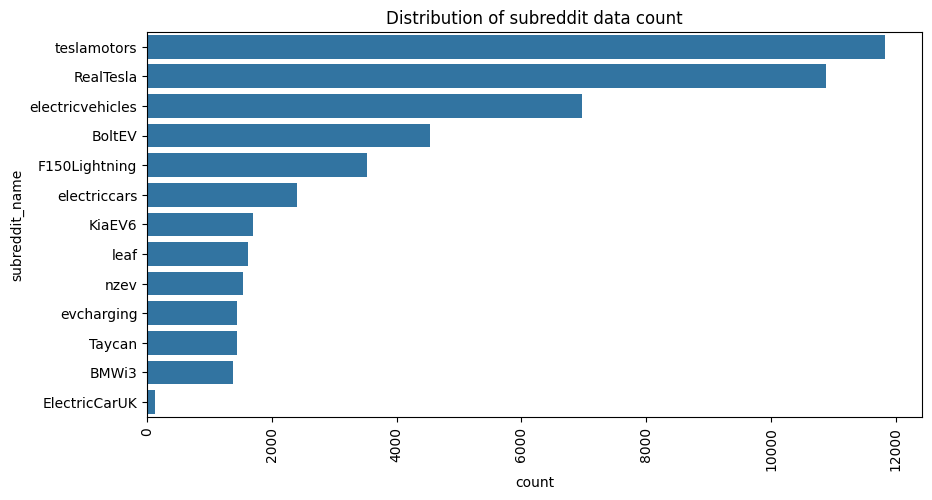

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot chart for distribution of subreddit data count
plt.figure(figsize=(10, 5))
# Plot horizontal bar chart
sns.countplot(y='subreddit_name', data=merged_df, order=merged_df['subreddit_name'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of records')
plt.show()

## Word cloud for the cleaned text

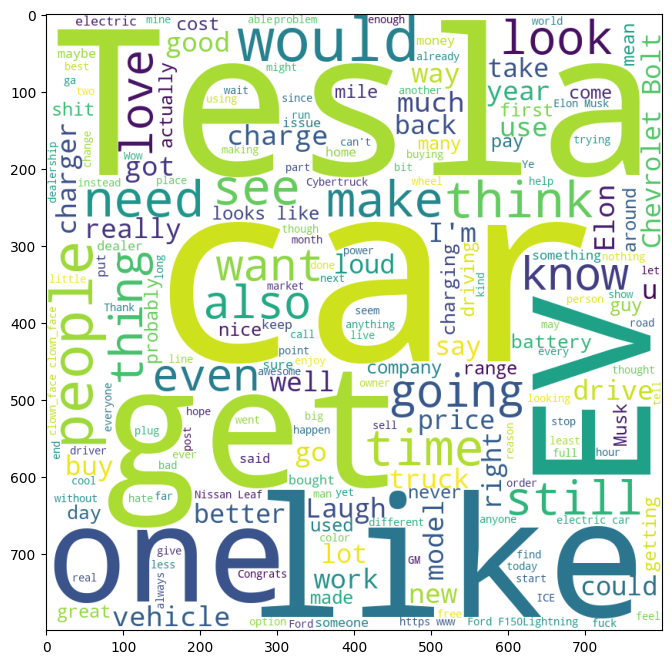

In [59]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords.words('english'), 
                min_font_size = 10).generate(' '.join(merged_df['text'].tolist()))

# Plot word cloud
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)

## Barchart for most commonly used words

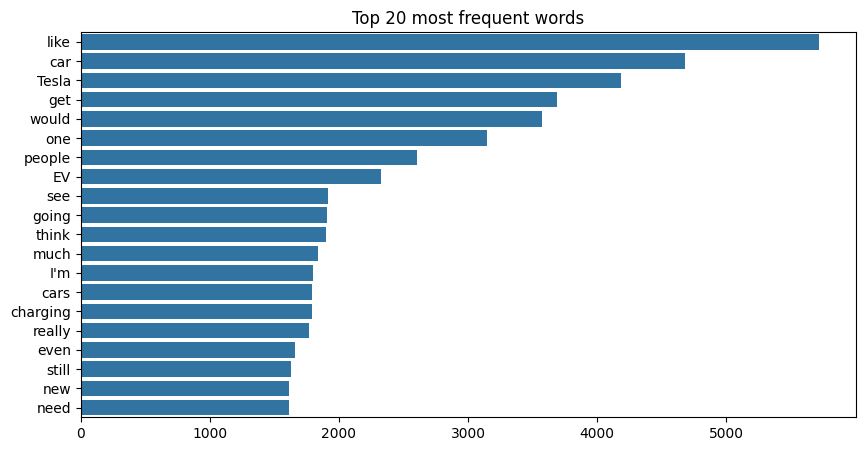

In [70]:
# Barchart for most commonly used words, top 20
from collections import Counter

# Tokenize
tokens = ' '.join(merged_df_no_stop.tolist()).split()
# Count
word_freq = Counter(tokens)
# Get top 20
top_20_words = word_freq.most_common(20)
# Plot horizontal bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=[word[1] for word in top_20_words], y=[word[0] for word in top_20_words])
plt.title('Top 20 most frequent words')
plt.show()